In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
#loading the train dataset
df = pd.read_csv(r"C:\Users\hp\Desktop\SCA mentee\final assessment\TrainingWiDS2021.csv")
# df[['altitude']].describe()
df

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,130153,164758,7,50.0,29.287256,0,Caucasian,M,175.3,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
130153,130154,197653,7,79.0,29.653433,0,Caucasian,F,162.6,Direct Admit,...,NaN,NaN,0,0,0,0,0,0,0,0
130154,130155,219719,7,73.0,32.265371,0,African American,M,177.8,Emergency Department,...,163.0,163.0,0,0,0,0,0,0,0,1
130155,130156,222562,170,81.0,24.408579,0,Caucasian,M,185.4,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0


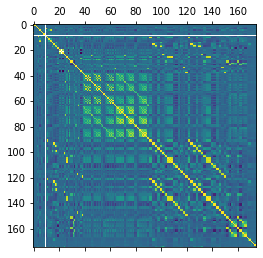

In [3]:
corr = df.corr()

plt.matshow(corr)
plt.show()

In [4]:
df.describe()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,130157.0,...,16760.000000,16760.000000,130157.00000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000
mean,65079.000000,213000.856519,106.102131,61.995103,29.110260,0.189840,169.607219,662.428344,0.839933,0.0,...,247.525419,239.617358,0.00103,0.016081,0.013599,0.025669,0.007307,0.004187,0.020852,0.216285
std,37573.233831,38109.828146,63.482277,16.822880,8.262776,0.392176,10.833085,304.259843,2.485337,0.0,...,131.440167,128.562211,0.03207,0.125786,0.115819,0.158146,0.085166,0.064574,0.142888,0.411712
min,1.000000,147000.000000,1.000000,0.000000,14.844926,0.000000,137.200000,82.000000,-0.250000,0.0,...,42.000000,38.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32540.000000,180001.000000,49.000000,52.000000,23.598006,0.000000,162.500000,427.000000,0.045833,0.0,...,144.000000,138.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65079.000000,213014.000000,112.000000,64.000000,27.564749,0.000000,170.100000,653.000000,0.155556,0.0,...,228.125000,218.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,97618.000000,246002.000000,165.000000,75.000000,32.803127,0.000000,177.800000,969.000000,0.423611,0.0,...,333.000000,324.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,130157.000000,279000.000000,204.000000,89.000000,67.814990,1.000000,195.590000,1111.000000,175.627778,0.0,...,720.000000,654.813793,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
corr

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
Unnamed: 0,1.000000,-0.001862,-0.000194,-0.037704,-0.003985,-0.016849,0.008826,0.989875,-0.009097,NaN,...,0.023807,0.035525,0.006372,-0.005301,0.000224,-0.019898,0.003937,-0.000596,-0.005415,-0.019601
encounter_id,-0.001862,1.000000,-0.001463,-0.001376,0.003641,0.001618,0.001393,-0.001498,-0.001066,NaN,...,-0.000578,-0.001582,0.002830,0.000727,-0.002442,-0.000217,-0.001831,0.002531,0.006676,-0.002007
hospital_id,-0.000194,-0.001463,1.000000,-0.019738,0.004834,0.028321,0.022645,0.005414,-0.005174,NaN,...,0.011336,0.000239,0.000956,0.002127,0.003403,-0.003745,0.002609,0.001734,-0.009420,0.001937
age,-0.037704,-0.001376,-0.019738,1.000000,-0.083176,0.058116,-0.113424,-0.035828,0.049000,NaN,...,-0.100749,-0.104265,-0.028410,-0.025476,-0.019699,0.021990,0.029104,0.022947,0.026277,0.081019
bmi,-0.003985,0.003641,0.004834,-0.083176,1.000000,0.011846,-0.056617,-0.007218,0.000595,NaN,...,-0.180801,-0.178718,-0.020725,-0.002822,-0.001782,-0.031128,-0.013784,-0.010434,-0.041589,0.169043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
immunosuppression,-0.019898,-0.000217,-0.003745,0.021990,-0.031128,-0.012172,0.000810,-0.021252,0.038840,NaN,...,-0.015663,-0.012850,0.017513,0.000879,0.002754,1.000000,0.130967,0.100071,0.277214,-0.003022
leukemia,0.003937,-0.001831,0.002609,0.029104,-0.013784,-0.016686,0.003450,0.003795,0.055669,NaN,...,-0.002058,-0.001054,-0.002754,-0.003796,0.000052,0.130967,1.000000,0.029363,0.008315,0.003574
lymphoma,-0.000596,0.002531,0.001734,0.022947,-0.010434,-0.005905,0.003788,-0.000570,0.016220,NaN,...,0.004547,0.005241,0.012759,-0.000723,-0.000423,0.100071,0.029363,1.000000,0.017183,-0.000253
solid_tumor_with_metastasis,-0.005415,0.006676,-0.009420,0.026277,-0.041589,0.021358,0.004357,-0.005885,0.033236,NaN,...,0.006640,0.007709,-0.001331,-0.002840,0.005150,0.277214,0.008315,0.017183,1.000000,-0.013190


In [6]:
df.isnull().sum()

Unnamed: 0                        0
encounter_id                      0
hospital_id                       0
age                            4988
bmi                            4490
                               ... 
immunosuppression                 0
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
diabetes_mellitus                 0
Length: 181, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Columns: 181 entries, Unnamed: 0 to diabetes_mellitus
dtypes: float64(157), int64(18), object(6)
memory usage: 179.7+ MB


In [8]:
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
categorical_cols


['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type']

In [9]:
df['ethnicity'].nunique()

6

In [10]:
# Separate target from predictors
y = df.diabetes_mellitus

#  confirmming there are no missing values in the target column
y.isnull().sum()

0

In [11]:
drop_col = ['ethnicity', 'diabetes_mellitus', 'hospital_admit_source', 
            'icu_admit_source', 'icu_stay_type', 'icu_type', 'encounter_id',
           'hospital_id', 'Unnamed: 0']
X =df.drop(drop_col, axis=1)

In [12]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == 'object']

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [14]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [15]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [16]:
clf = XGBClassifier(n_estimators=500, random_state=0, use_label_encoder=False)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', clf)
                             ])

In [17]:
pipeline.fit(X_train, y_train)

[15:02:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0),
                                                  ['age', 'bmi',
                                                   'elective_surgery', 'height',
                                                   'icu_id', 'pre_icu_lo

In [18]:
# Preprocessing of validation data, get predictions
preds = pipeline.predict(X_valid)

In [19]:
accuracy = accuracy_score(preds, y_valid)
print(f'Accuracy = {accuracy}') 

Accuracy = 0.8294406883835279


In [20]:
#Reading the test dataset
df_test = pd.read_csv(r"C:\Users\hp\Desktop\SCA mentee\final assessment\UnlabeledWiDS2021.csv")
df_test

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,3,142038,10141,72,NaN,0,Caucasian,F,162.6,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,4,138628,10141,66,NaN,0,Caucasian,M,177.8,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,5,141682,10141,89,NaN,0,Caucasian,M,170.2,Direct Admit,...,NaN,NaN,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,10230,143750,10140,36,37.5,0,Caucasian,F,170.1,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
10230,10231,143813,10140,61,32.1,0,Caucasian,F,160.0,Emergency Department,...,NaN,NaN,NaN,0,0,0,0,0,0,0
10231,10232,137126,10140,74,22.7,0,Caucasian,F,165.1,Step-Down Unit (SDU),...,NaN,NaN,NaN,0,0,0,0,0,0,0
10232,10233,135652,10140,90,19.9,0,Caucasian,F,160.0,Emergency Department,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [23]:
drop_col.remove("diabetes_mellitus")
X_test = df_test.drop(drop_col, axis=1)

In [24]:
# Preprocessing and fitting of test data
preds_test = pipeline.predict(X_test)

In [25]:
preds_test

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# Save test predictions to file
output = pd.DataFrame({'encounter_id': df_test.encounter_id,
                       'diabetes_mellitus': preds_test})
output.to_csv('Wids_submission.csv', index=False)